In [3]:
setwd('~/r_projects/stat634/')

In [4]:
library(tidyverse)
library(ggplot2)
source('AIS/initial_testing.R')

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [5]:
ais_info <- format_inputs()

In [6]:
head(ais_info)

id,Score,State,Category,Capacity
<dbl>,<fct>,<chr>,<chr>,<dbl>
1,5,MD,Situational,1
2,3,MD,Situational,2
3,3,MD,Situational,3
4,5,MD,Situational,4
5,5,MD,Situational,5
6,3,MD,Situational,6


In [7]:
chisq_results <- chisq_test()

In [8]:
chisq_results


	Pearson's Chi-squared test

data:  prep_chi_square_tbl()
X-squared = 9.0237, df = 2, p-value = 0.01098


In [9]:
ais_summary <- ais_info %>% group_by(State, Score) %>% count()

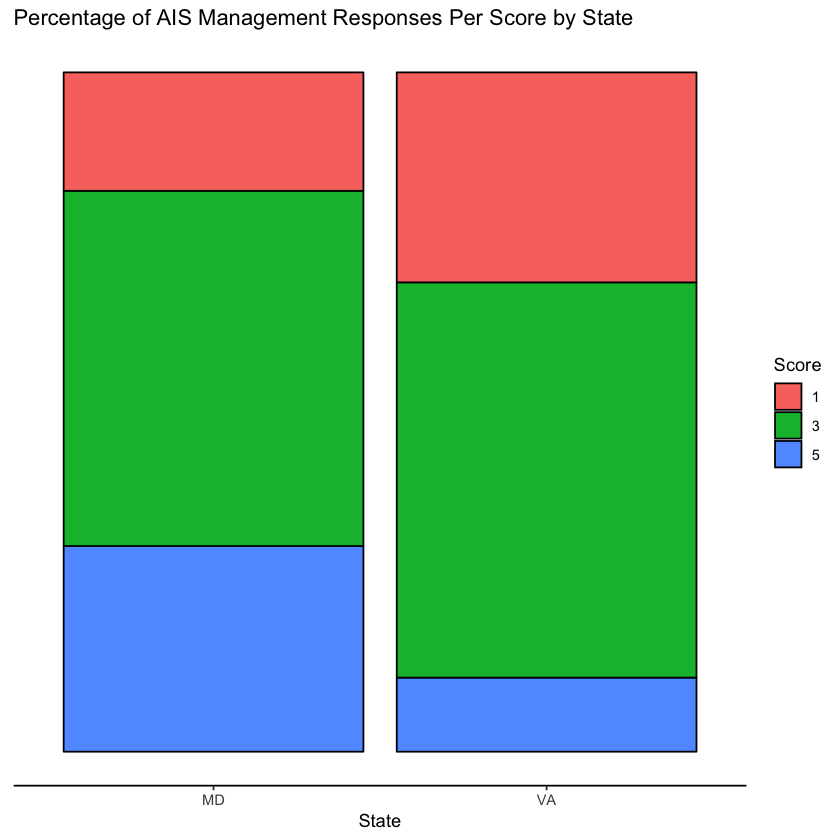

In [10]:
ggplot(ais_summary, aes(x=State,y=n,fill=Score)) + 
    geom_bar(stat="identity", position="fill", colour="black") + 
    theme_classic() + 
    theme(axis.title.y = element_blank(), axis.text.y = element_blank(), 
      axis.ticks.y = element_blank(), axis.line.y = element_blank()) + ggtitle("Percentage of AIS Management Responses Per Score by State")

In [11]:
state_cat <- ais_info %>% filter(Category=="State")

In [12]:
head(state_cat)

id,Score,State,Category,Capacity
<dbl>,<fct>,<chr>,<chr>,<dbl>
59,5,MD,State,1
60,3,MD,State,2
61,5,MD,State,3
62,5,MD,State,4
63,3,MD,State,5
64,5,MD,State,6


In [13]:
state_summary  <- state_cat %>% 
group_by(State, Score, Category) %>% 
count() %>% 
mutate(Assessment=if_else(Score=="1", "Poorly Developed", if_else(Score=="3", "Moderately Developed", "Highly Developed")))

In [14]:
state_summary

State,Score,Category,n,Assessment
<chr>,<fct>,<chr>,<int>,<chr>
MD,1,State,2,Poorly Developed
MD,3,State,5,Moderately Developed
MD,5,State,11,Highly Developed
VA,1,State,2,Poorly Developed
VA,3,State,6,Moderately Developed
VA,5,State,1,Highly Developed


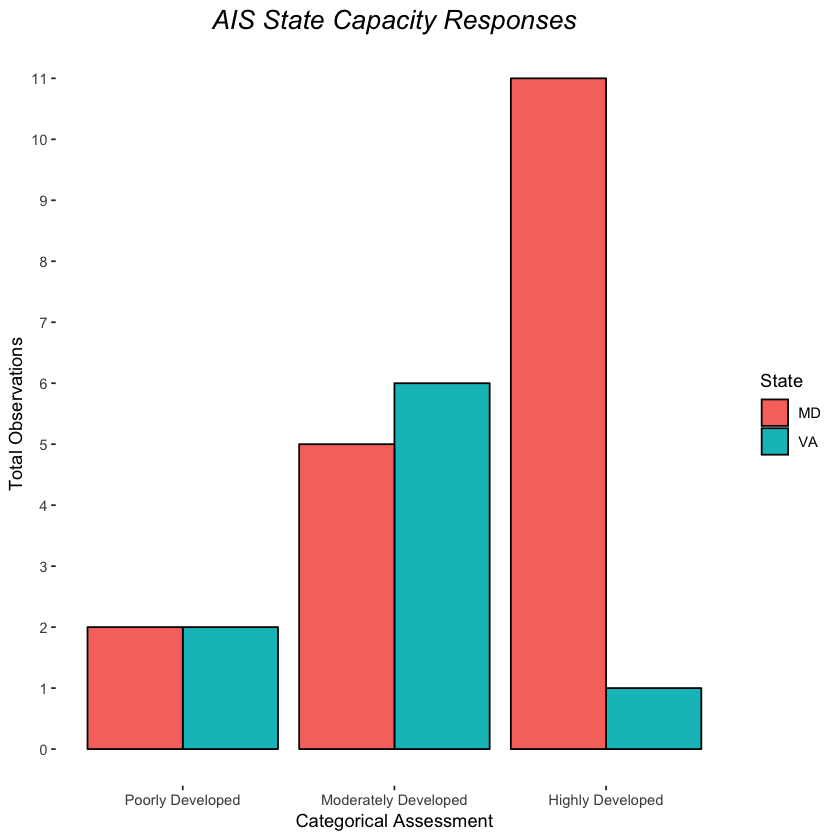

In [15]:
ggplot(state_summary, aes(x=Score, y=n, fill=State)) + 
    geom_bar(stat="identity", position="dodge", colour="black") + 
    theme_classic() + 
    scale_y_discrete(limits=c(0,1,2,3,4,5,6,7,8,9,10,11)) +
    scale_x_discrete(labels=c("Poorly Developed", "Moderately Developed", "Highly Developed")) +
    ylab("Total Observations") +
    xlab("Categorical Assessment") +
    labs(title="AIS State Capacity Responses") +
    theme(axis.line.y.left = element_blank(), axis.line.x.bottom = element_blank(), plot.title = element_text(hjust=0.5, face="italic", size=16))

In [27]:
state_percentage = state_summary %>% group_by(State) %>% mutate(percentage=n/sum(n)) %>% mutate(n_bar=paste0("n=", n))

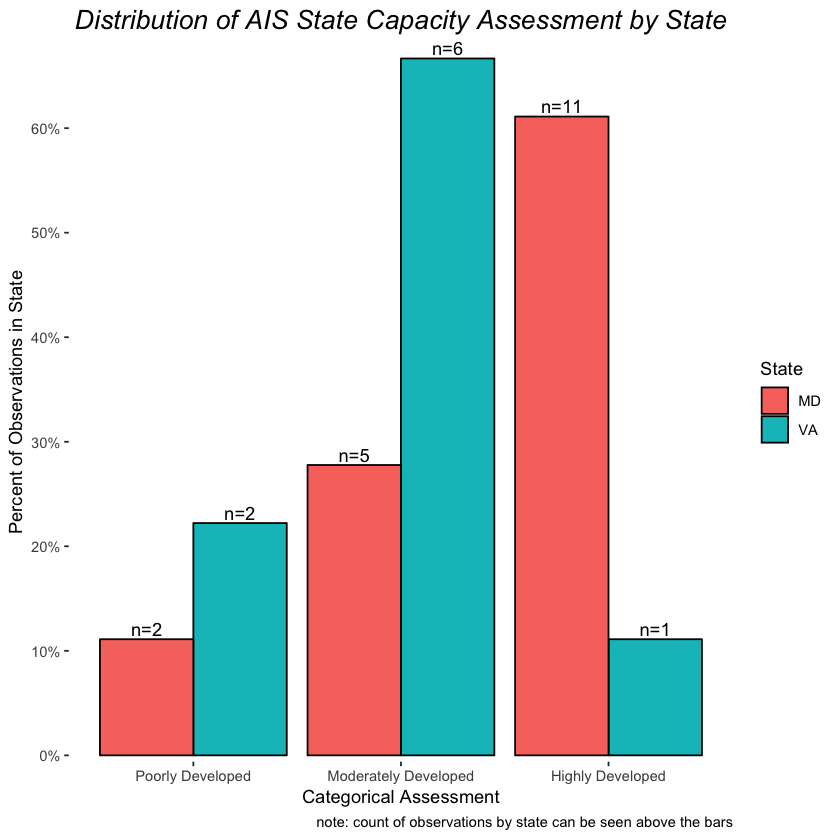

In [28]:
ggplot(state_percentage, aes(x=Score, y=(100 * percentage), fill=State)) + 
    geom_bar(stat="identity", position="dodge", colour="black") + 
    theme_classic() + 
    scale_y_discrete(labels=c("0%","10%","20%","30%","40%","50%","60%"), limits=c(0,10,20,30,40,50,60)) +
    scale_x_discrete(labels=c("Poorly Developed", "Moderately Developed", "Highly Developed")) +
    ylab("Percent of Observations in State") +
    xlab("Categorical Assessment") +
    labs(title="Distribution of AIS State Capacity Assessment by State", caption="note: count of observations by state can be seen above the bars") +
    theme(axis.line.y.left = element_blank(), axis.line.x.bottom = element_blank(), plot.title = element_text(hjust=0.5, face="italic", size=16)) +
    geom_text(aes(y=(100*percentage) + 1,label=n_bar), position=position_dodge(width = 0.9))

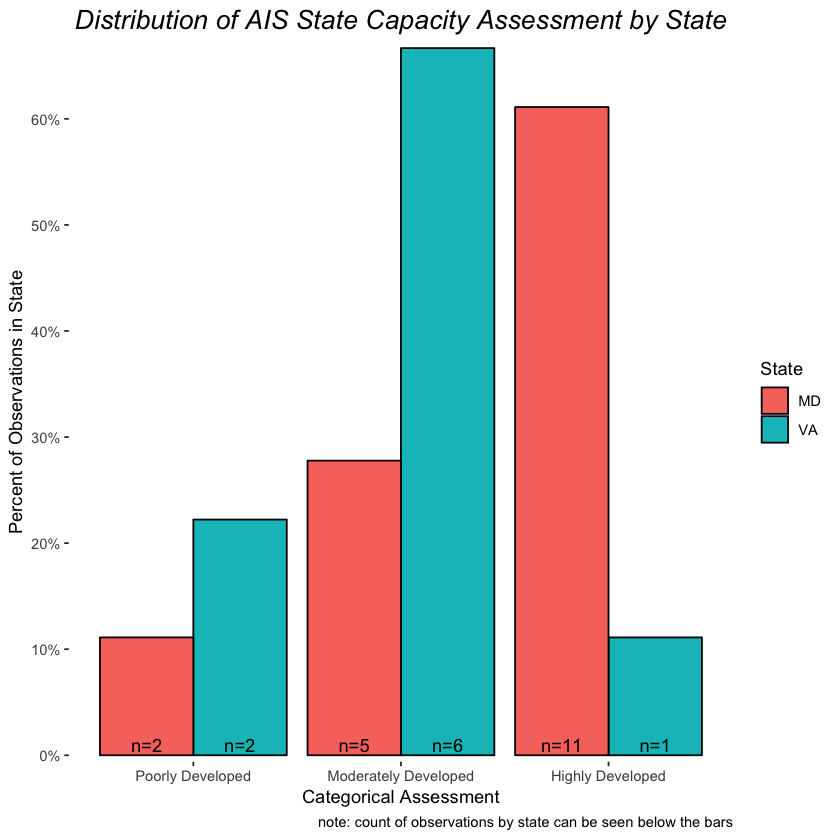

In [44]:
ggplot(state_percentage, aes(x=Score, y=(100 * percentage), fill=State)) + 
    geom_bar(stat="identity", position="dodge", colour="black") + 
    theme_classic() + 
    scale_y_discrete(labels=c("0%","10%","20%","30%","40%","50%","60%"), limits=c(0,10,20,30,40,50,60)) +
    scale_x_discrete(labels=c("Poorly Developed", "Moderately Developed", "Highly Developed")) +
    ylab("Percent of Observations in State") +
    xlab("Categorical Assessment") +
    labs(title="Distribution of AIS State Capacity Assessment by State", caption="note: count of observations by state can be seen below the bars") +
    theme(axis.line.y.left = element_blank(), axis.line.x.bottom = element_blank(), plot.title = element_text(hjust=0.5, face="italic", size=16)) +
    geom_text(aes(y=0+1,label=n_bar), position=position_dodge(width = 0.9))

In [18]:
unique(ais_info$Category)

[1] "Situational"    "Political"      "Institutional"  "State"         
[5] "Organizational" "Evaluation"

In [24]:
situational_cat <- ais_info %>% 
    filter(Category=="Situational") %>%
    group_by(State, Score, Category) %>% 
    count() %>% 
    mutate(Assessment=if_else(Score=="1", "Poorly Developed", if_else(Score=="3", "Moderately Developed", "Highly Developed"))) %>% 
    group_by(State) %>% 
    mutate(percentage=n/sum(n)) %>%
    mutate(n_bar=paste0("n=", n))

In [25]:
situational_cat

State,Score,Category,n,Assessment,percentage,n_bar
<chr>,<fct>,<chr>,<int>,<chr>,<dbl>,<chr>
MD,3,Situational,8,Moderately Developed,0.4,n=8
MD,5,Situational,12,Highly Developed,0.6,n=12
VA,1,Situational,2,Poorly Developed,0.2,n=2
VA,3,Situational,6,Moderately Developed,0.6,n=6
VA,5,Situational,2,Highly Developed,0.2,n=2


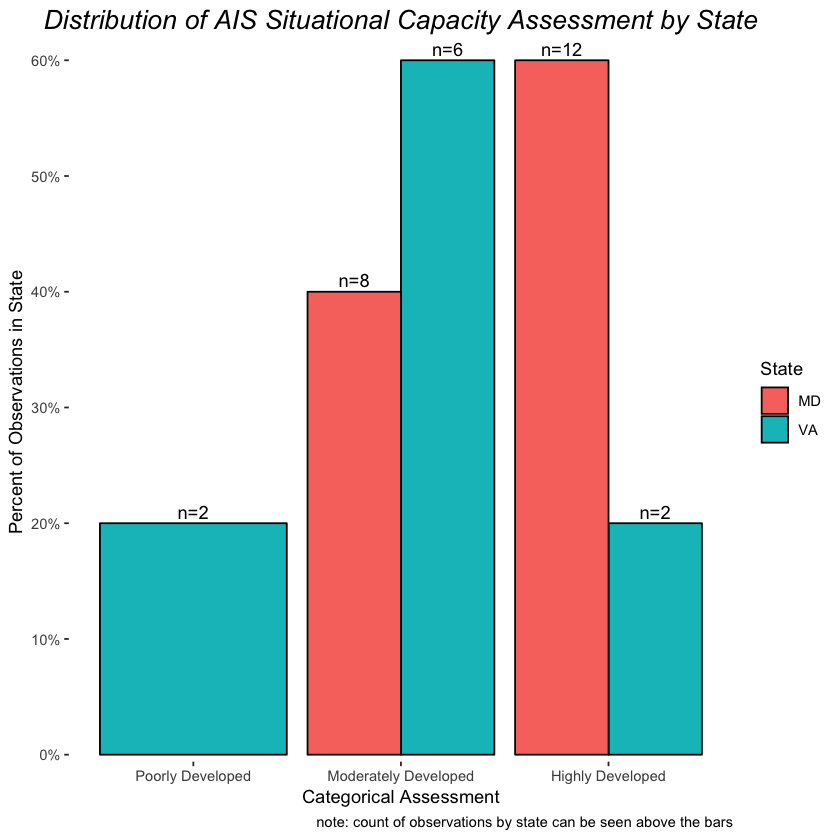

In [32]:
ggplot(situational_cat, aes(x=Score, y=(100 * percentage), fill=State)) + 
    geom_bar(stat="identity", position="dodge", colour="black") + 
    theme_classic() + 
    scale_y_discrete(labels=c("0%","10%","20%","30%","40%","50%","60%"), limits=c(0,10,20,30,40,50,60)) +
    scale_x_discrete(labels=c("Poorly Developed", "Moderately Developed", "Highly Developed")) +
    ylab("Percent of Observations in State") +
    xlab("Categorical Assessment") +
    labs(title="Distribution of AIS Situational Capacity Assessment by State", caption="note: count of observations by state can be seen above the bars") +
    theme(axis.line.y.left = element_blank(), axis.line.x.bottom = element_blank(), plot.title = element_text(hjust=0.5, face="italic", size=16)) +
    geom_text(aes(y=(100*percentage) + 1,label=n_bar), position=position_dodge(width = 0.9))

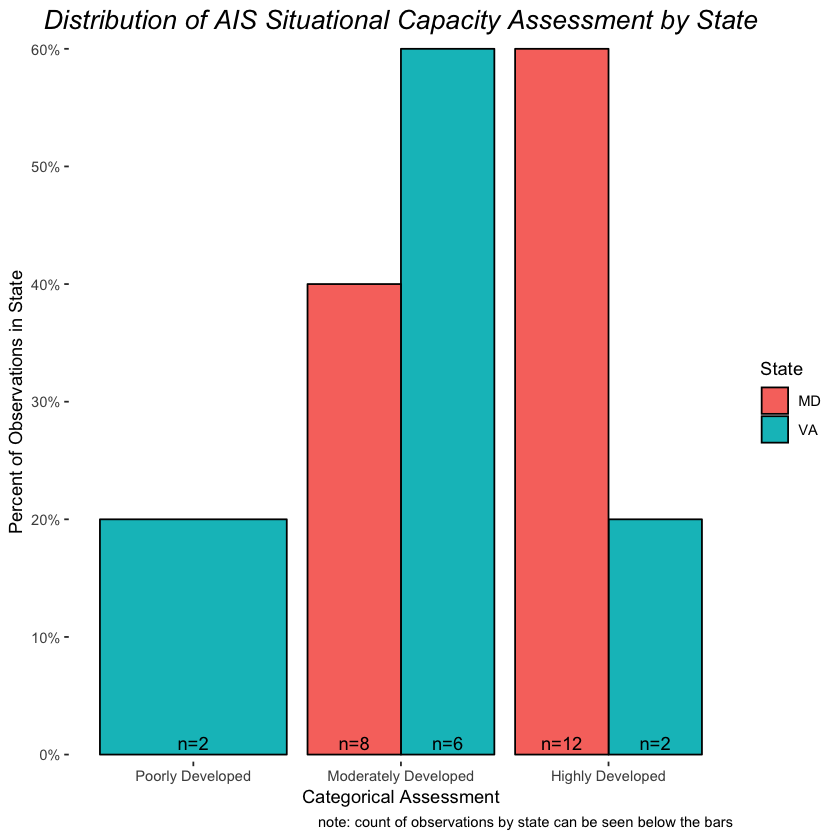

In [43]:
ggplot(situational_cat, aes(x=Score, y=(100 * percentage), fill=State)) + 
    geom_bar(stat="identity", position="dodge", colour="black") + 
    theme_classic() + 
    scale_y_discrete(labels=c("0%","10%","20%","30%","40%","50%","60%"), limits=c(0,10,20,30,40,50,60)) +
    scale_x_discrete(labels=c("Poorly Developed", "Moderately Developed", "Highly Developed")) +
    ylab("Percent of Observations in State") +
    xlab("Categorical Assessment") +
    labs(title="Distribution of AIS Situational Capacity Assessment by State", caption="note: count of observations by state can be seen below the bars") +
    theme(axis.line.y.left = element_blank(), axis.line.x.bottom = element_blank(), plot.title = element_text(hjust=0.5, face="italic", size=16)) +
    geom_text(aes(y=0 + 1,label=n_bar), position=position_dodge(width = 0.9))

In [34]:
political_cat <- ais_info %>% 
    filter(Category=="Political") %>%
    group_by(State, Score, Category) %>% 
    count() %>% 
    mutate(Assessment=if_else(Score=="1", "Poorly Developed", if_else(Score=="3", "Moderately Developed", "Highly Developed"))) %>% 
    group_by(State) %>% 
    mutate(percentage=n/sum(n)) %>%
    mutate(n_bar=paste0("n=", n))

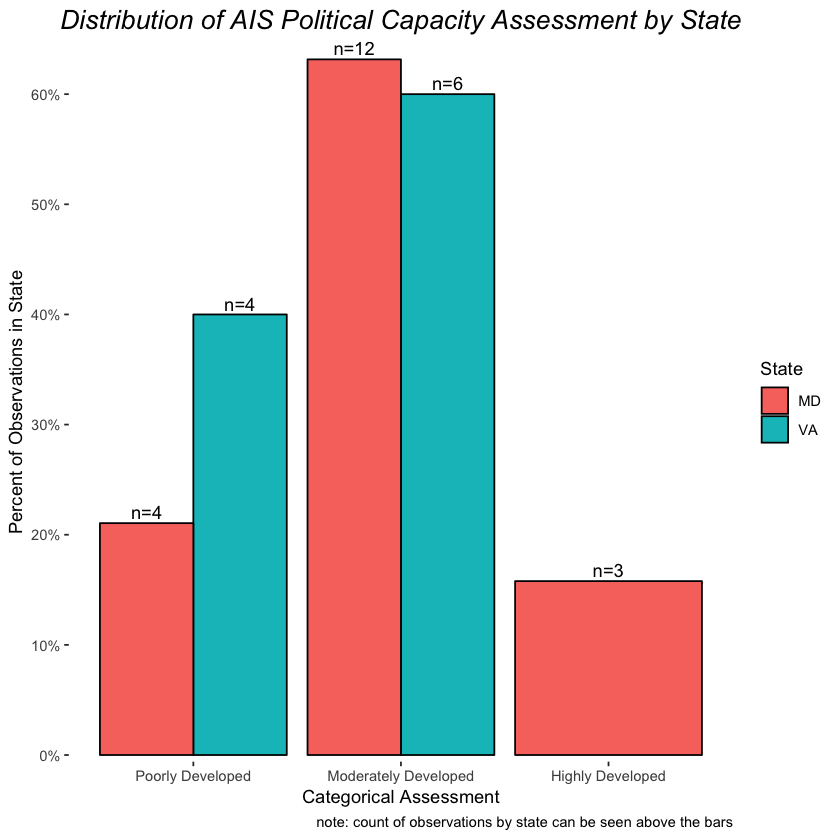

In [36]:
ggplot(political_cat, aes(x=Score, y=(100 * percentage), fill=State)) + 
    geom_bar(stat="identity", position="dodge", colour="black") + 
    theme_classic() + 
    scale_y_discrete(labels=c("0%","10%","20%","30%","40%","50%","60%"), limits=c(0,10,20,30,40,50,60)) +
    scale_x_discrete(labels=c("Poorly Developed", "Moderately Developed", "Highly Developed")) +
    ylab("Percent of Observations in State") +
    xlab("Categorical Assessment") +
    labs(title="Distribution of AIS Political Capacity Assessment by State", caption="note: count of observations by state can be seen above the bars") +
    theme(axis.line.y.left = element_blank(), axis.line.x.bottom = element_blank(), plot.title = element_text(hjust=0.5, face="italic", size=16)) +
    geom_text(aes(y=(100*percentage) + 1,label=n_bar), position=position_dodge(width = 0.9))

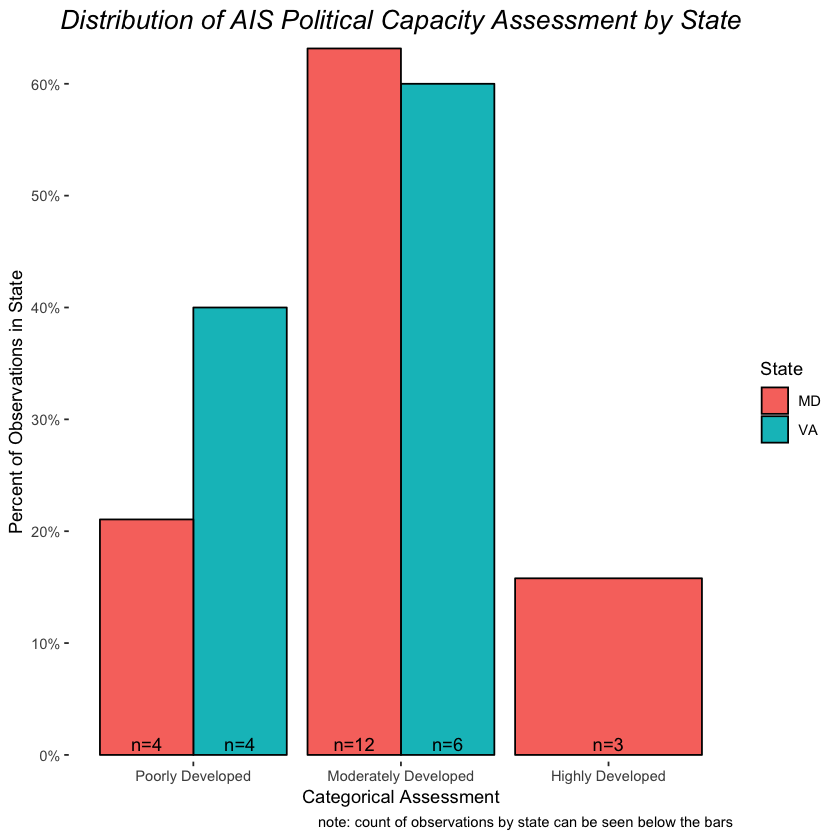

In [41]:
ggplot(political_cat, aes(x=Score, y=(100 * percentage), fill=State)) + 
    geom_bar(stat="identity", position="dodge", colour="black") + 
    theme_classic() + 
    scale_y_discrete(labels=c("0%","10%","20%","30%","40%","50%","60%"), limits=c(0,10,20,30,40,50,60)) +
    scale_x_discrete(labels=c("Poorly Developed", "Moderately Developed", "Highly Developed")) +
    ylab("Percent of Observations in State") +
    xlab("Categorical Assessment") +
    labs(title="Distribution of AIS Political Capacity Assessment by State", caption="note: count of observations by state can be seen below the bars") +
    theme(axis.line.y.left = element_blank(), axis.line.x.bottom = element_blank(), plot.title = element_text(hjust=0.5, face="italic", size=16)) +
    geom_text(aes(y=0 + 1,label=n_bar), position=position_dodge(width = 0.9))

In [38]:
institutional_cat <- ais_info %>% 
    filter(Category=="Institutional") %>%
    group_by(State, Score, Category) %>% 
    count() %>% 
    mutate(Assessment=if_else(Score=="1", "Poorly Developed", if_else(Score=="3", "Moderately Developed", "Highly Developed"))) %>% 
    group_by(State) %>% 
    mutate(percentage=n/sum(n)) %>%
    mutate(n_bar=paste0("n=", n))

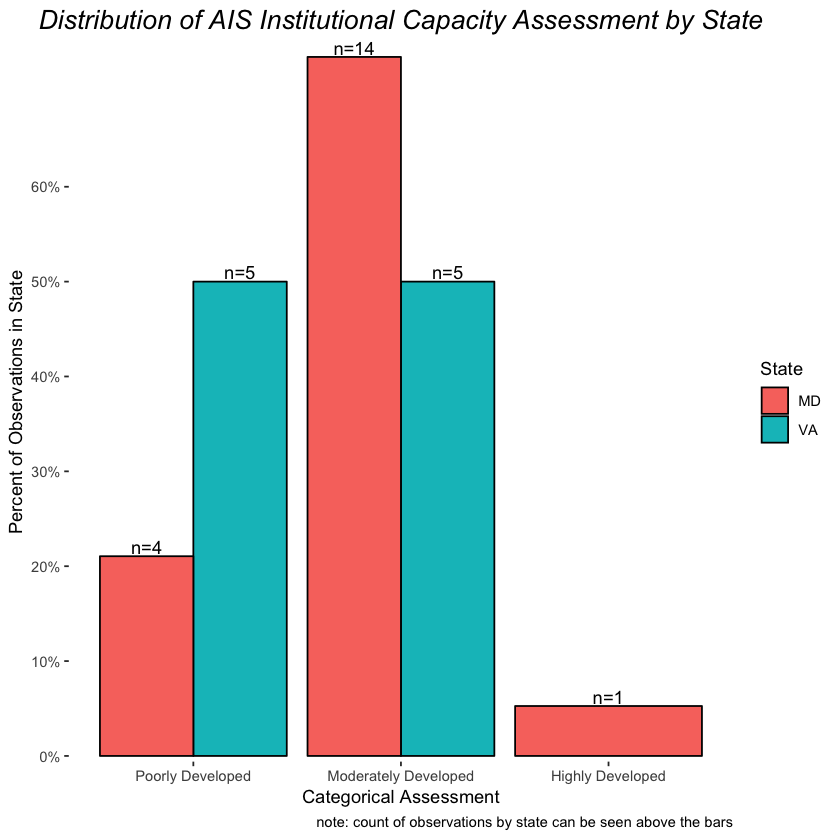

In [46]:
ggplot(institutional_cat, aes(x=Score, y=(100 * percentage), fill=State)) + 
    geom_bar(stat="identity", position="dodge", colour="black") + 
    theme_classic() + 
    scale_y_discrete(labels=c("0%","10%","20%","30%","40%","50%","60%"), limits=c(0,10,20,30,40,50,60)) +
    scale_x_discrete(labels=c("Poorly Developed", "Moderately Developed", "Highly Developed")) +
    ylab("Percent of Observations in State") +
    xlab("Categorical Assessment") +
    labs(title="Distribution of AIS Institutional Capacity Assessment by State", caption="note: count of observations by state can be seen above the bars") +
    theme(axis.line.y.left = element_blank(), axis.line.x.bottom = element_blank(), plot.title = element_text(hjust=0.5, face="italic", size=16)) +
    geom_text(aes(y=(100*percentage) + 1,label=n_bar), position=position_dodge(width = 0.9))

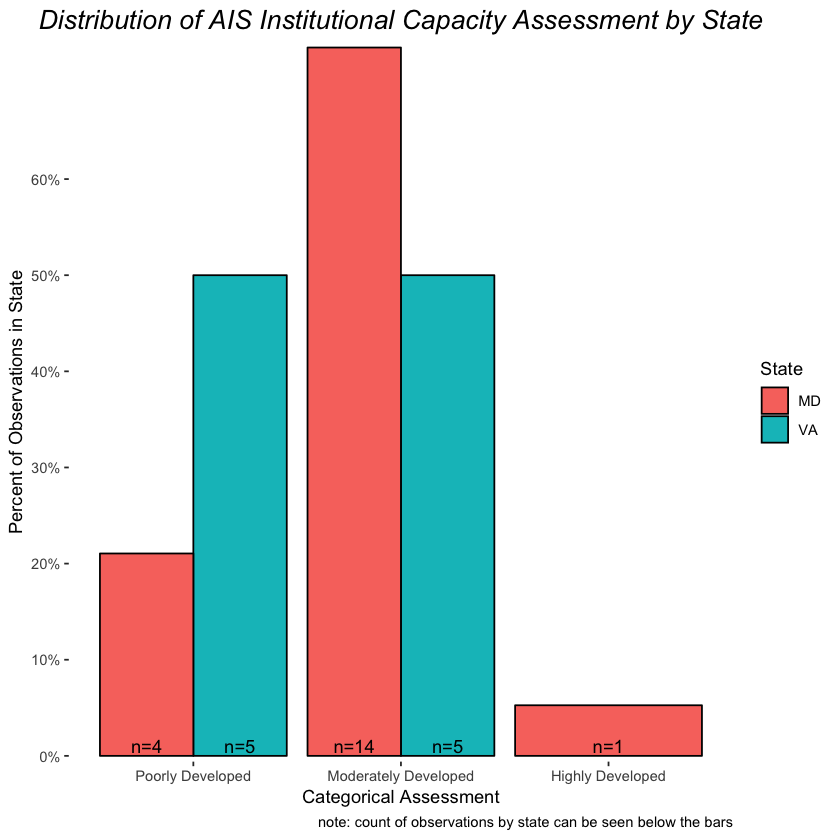

In [48]:
ggplot(institutional_cat, aes(x=Score, y=(100 * percentage), fill=State)) + 
    geom_bar(stat="identity", position="dodge", colour="black") + 
    theme_classic() + 
    scale_y_discrete(labels=c("0%","10%","20%","30%","40%","50%","60%"), limits=c(0,10,20,30,40,50,60)) +
    scale_x_discrete(labels=c("Poorly Developed", "Moderately Developed", "Highly Developed")) +
    ylab("Percent of Observations in State") +
    xlab("Categorical Assessment") +
    labs(title="Distribution of AIS Institutional Capacity Assessment by State", caption="note: count of observations by state can be seen below the bars") +
    theme(axis.line.y.left = element_blank(), axis.line.x.bottom = element_blank(), plot.title = element_text(hjust=0.5, face="italic", size=16)) +
    geom_text(aes(y=0 + 1,label=n_bar), position=position_dodge(width = 0.9))

In [49]:
organizational_cat <- ais_info %>% 
    filter(Category=="Organizational") %>%
    group_by(State, Score, Category) %>% 
    count() %>% 
    mutate(Assessment=if_else(Score=="1", "Poorly Developed", if_else(Score=="3", "Moderately Developed", "Highly Developed"))) %>% 
    group_by(State) %>% 
    mutate(percentage=n/sum(n)) %>%
    mutate(n_bar=paste0("n=", n))

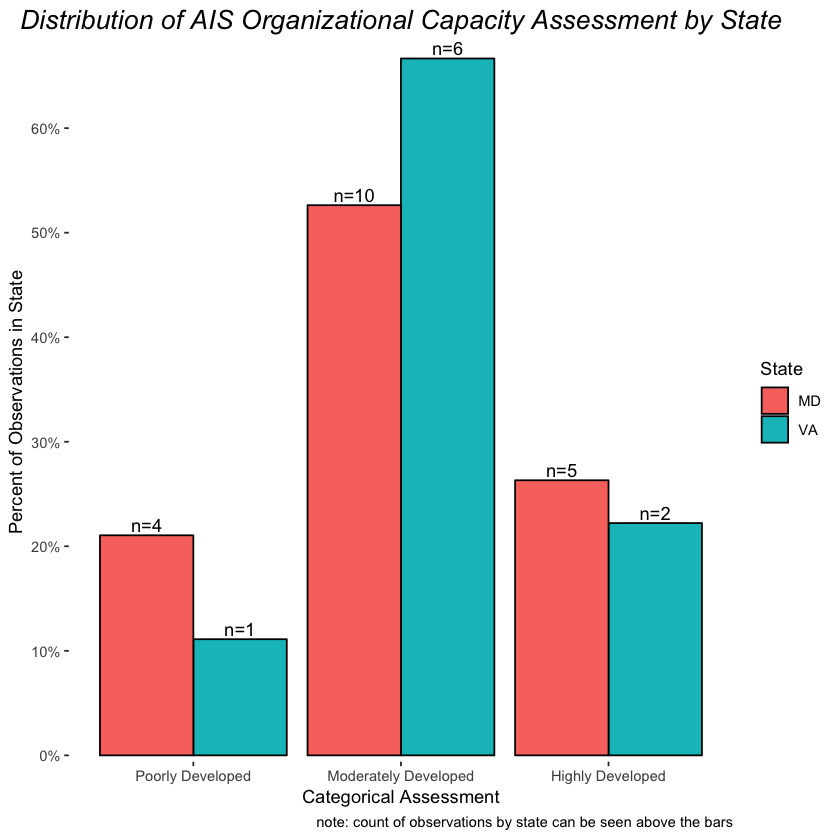

In [50]:
ggplot(organizational_cat, aes(x=Score, y=(100 * percentage), fill=State)) + 
    geom_bar(stat="identity", position="dodge", colour="black") + 
    theme_classic() + 
    scale_y_discrete(labels=c("0%","10%","20%","30%","40%","50%","60%"), limits=c(0,10,20,30,40,50,60)) +
    scale_x_discrete(labels=c("Poorly Developed", "Moderately Developed", "Highly Developed")) +
    ylab("Percent of Observations in State") +
    xlab("Categorical Assessment") +
    labs(title="Distribution of AIS Organizational Capacity Assessment by State", caption="note: count of observations by state can be seen above the bars") +
    theme(axis.line.y.left = element_blank(), axis.line.x.bottom = element_blank(), plot.title = element_text(hjust=0.5, face="italic", size=16)) +
    geom_text(aes(y=(100*percentage) + 1,label=n_bar), position=position_dodge(width = 0.9))

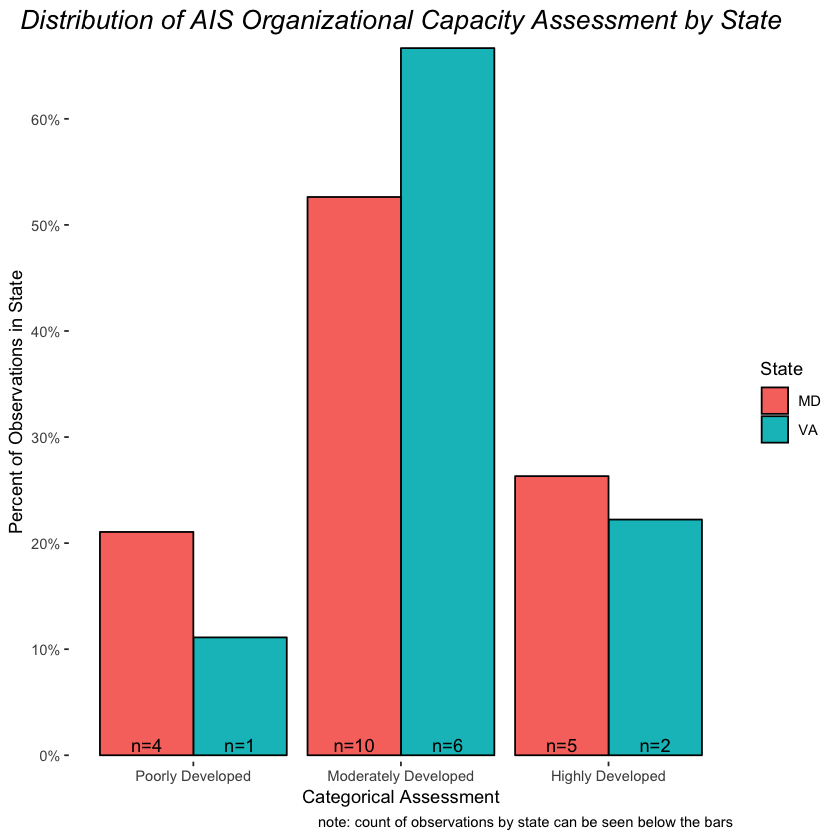

In [51]:
ggplot(organizational_cat, aes(x=Score, y=(100 * percentage), fill=State)) + 
    geom_bar(stat="identity", position="dodge", colour="black") + 
    theme_classic() + 
    scale_y_discrete(labels=c("0%","10%","20%","30%","40%","50%","60%"), limits=c(0,10,20,30,40,50,60)) +
    scale_x_discrete(labels=c("Poorly Developed", "Moderately Developed", "Highly Developed")) +
    ylab("Percent of Observations in State") +
    xlab("Categorical Assessment") +
    labs(title="Distribution of AIS Organizational Capacity Assessment by State", caption="note: count of observations by state can be seen below the bars") +
    theme(axis.line.y.left = element_blank(), axis.line.x.bottom = element_blank(), plot.title = element_text(hjust=0.5, face="italic", size=16)) +
    geom_text(aes(y=0 + 1,label=n_bar), position=position_dodge(width = 0.9))

In [52]:
evaluation_cat <- ais_info %>% 
    filter(Category=="Evaluation") %>%
    group_by(State, Score, Category) %>% 
    count() %>% 
    mutate(Assessment=if_else(Score=="1", "Poorly Developed", if_else(Score=="3", "Moderately Developed", "Highly Developed"))) %>% 
    group_by(State) %>% 
    mutate(percentage=n/sum(n)) %>%
    mutate(n_bar=paste0("n=", n))

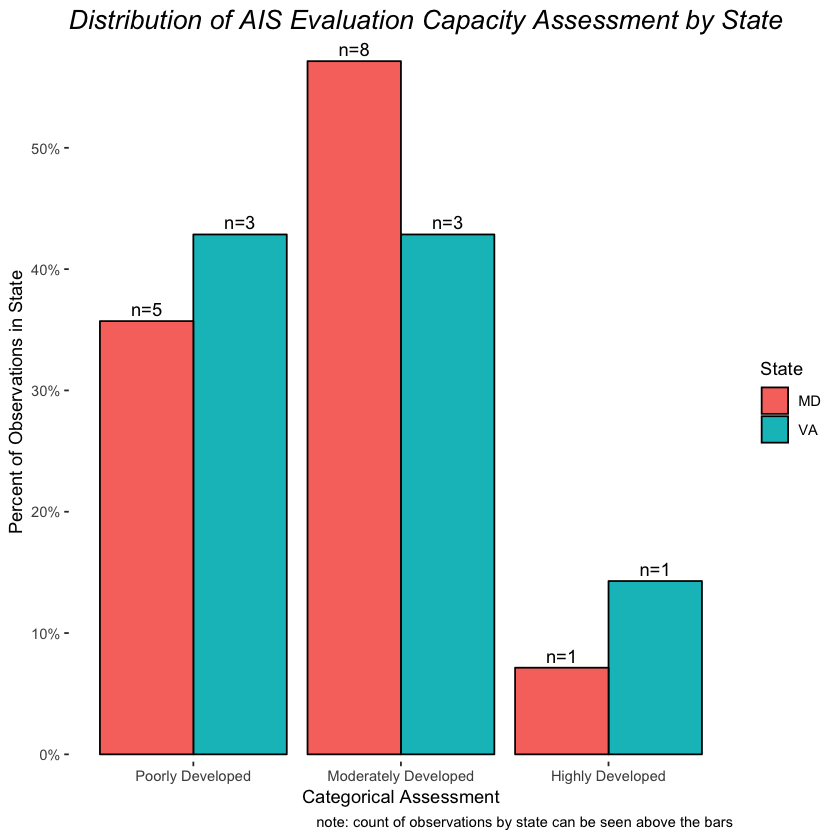

In [60]:
ggplot(evaluation_cat, aes(x=Score, y=(100 * percentage), fill=State)) + 
    geom_bar(stat="identity", position="dodge", colour="black") + 
    theme_classic() + 
    scale_y_discrete(labels=c("0%","10%","20%","30%","40%","50%"), limits=c(0,10,20,30,40,50)) +
    scale_x_discrete(labels=c("Poorly Developed", "Moderately Developed", "Highly Developed")) +
    ylab("Percent of Observations in State") +
    xlab("Categorical Assessment") +
    labs(title="Distribution of AIS Evaluation Capacity Assessment by State", caption="note: count of observations by state can be seen above the bars") +
    theme(axis.line.y.left = element_blank(), axis.line.x.bottom = element_blank(), plot.title = element_text(hjust=0, face="italic", size=16)) +
    geom_text(aes(y=(100*percentage) + 1,label=n_bar), position=position_dodge(width = 0.9))

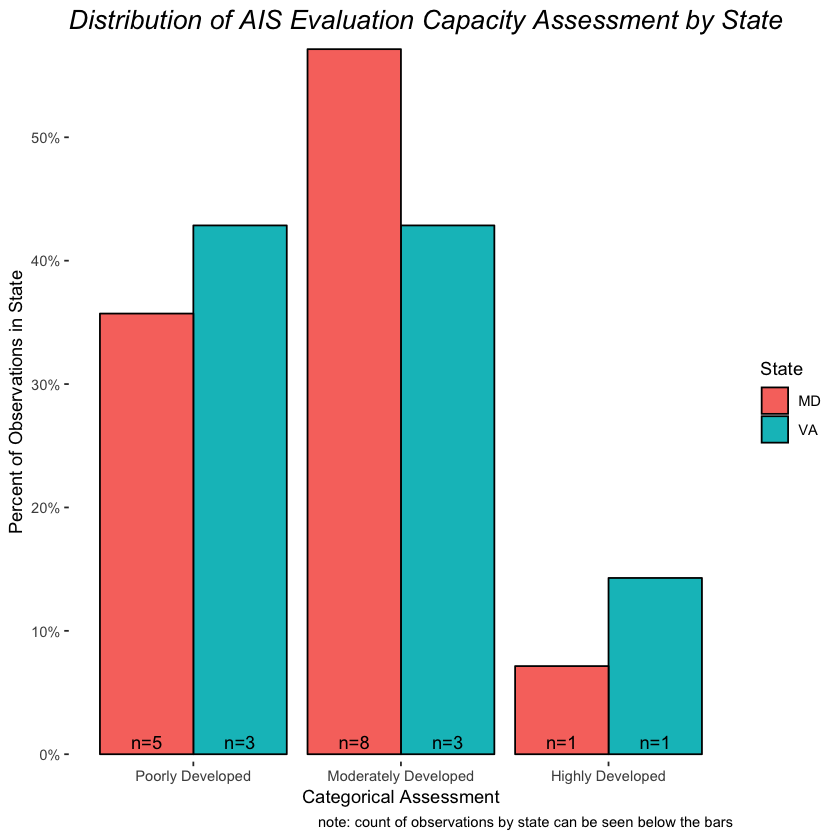

In [61]:
ggplot(evaluation_cat, aes(x=Score, y=(100 * percentage), fill=State)) + 
    geom_bar(stat="identity", position="dodge", colour="black") + 
    theme_classic() + 
    scale_y_discrete(labels=c("0%","10%","20%","30%","40%","50%"), limits=c(0,10,20,30,40,50)) +
    scale_x_discrete(labels=c("Poorly Developed", "Moderately Developed", "Highly Developed")) +
    ylab("Percent of Observations in State") +
    xlab("Categorical Assessment") +
    labs(title="Distribution of AIS Evaluation Capacity Assessment by State", caption="note: count of observations by state can be seen below the bars") +
    theme(axis.line.y.left = element_blank(), axis.line.x.bottom = element_blank(), plot.title = element_text(hjust=0, face="italic", size=16)) +
    geom_text(aes(y=0 + 1,label=n_bar), position=position_dodge(width = 0.9))